In [145]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [146]:
# Datasets

# Load the CSV file as a numpy array
data = np.loadtxt("haberman.csv", delimiter=",")

# Print the array
print(type(data))

<class 'numpy.ndarray'>


Visualize Dataset

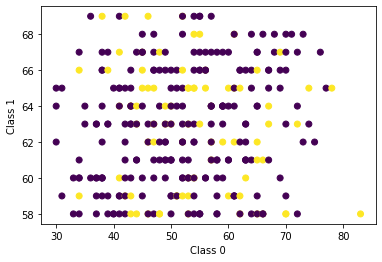

In [147]:
# separate the features and labels
X = data[:, :-1]
y = data[:, -1]

# plot the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y)

# set the x and y labels
plt.xlabel('Class 0')
plt.ylabel('Class 1')

# show the plot
plt.show()


In [148]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Transposing the train and test features to make them column vectors
X_train = X_train.T
y_train = y_train.T

X_test = X_test.T
y_test = y_test.T
# Reshaping the train and test labels to avoid index out of range error
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])

# print(type(y_train))
print(X_train.shape)
print(y_train.shape)

m = X_train.shape[1]
m

(3, 214)
(1, 214)


214

In [149]:
# Set the number of units/neurons in each layer
def set_units(X_train, y_train):
    input_units = X_train.shape[0]
    hidden_units = 3     # initial number of hidden units
    output_units = y_train.shape[0]

    return input_units, hidden_units, output_units

input_units, hidden_units, output_units = set_units(X_train, y_train)
    


In [150]:
def initialize_params(input_units,hidden_units, output_units):
    
   
    W_ij = np.random.randn(hidden_units, input_units)
    u_hj = np.zeros([hidden_units, 1])
    W_jk = np.random.randn(output_units, hidden_units)
    u_ok = np.zeros([output_units, 1])

    params = {
        "W_ij": W_ij,
        "u_hj": u_hj,
        "W_jk": W_jk,
        "u_ok": u_ok
    }
    return params

params = initialize_params(input_units, hidden_units, output_units)
print(params)
print("W_ij Shape: ",params["W_ij"].shape)
print("u_hj Shape: ",params["u_hj"].shape)
print("W_jk Shape: ",params["W_jk"].shape)
print("u_ok Shape: ",params["u_ok"].shape)

{'W_ij': array([[ 1.33592289,  1.47361218, -0.50449656],
       [ 1.53465081, -0.0541272 ,  2.08848303],
       [ 0.10795583, -0.71624159, -0.95643986]]), 'u_hj': array([[0.],
       [0.],
       [0.]]), 'W_jk': array([[-0.22683562,  0.80242204, -2.04637899]]), 'u_ok': array([[0.]])}
W_ij Shape:  (3, 3)
u_hj Shape:  (3, 1)
W_jk Shape:  (1, 3)
u_ok Shape:  (1, 1)


In [151]:
def initialize_hyperparams():
    eta1 =0.3
    k1=0.9
    eta2 = 0.3
    k2= 0.9
    hyperparams = {
        'eta1': eta1,
        'k1': k1,
        'eta2': eta2,
        'k2': k2
    }

    return hyperparams

hyperparams = initialize_hyperparams()
hyperparams

{'eta1': 0.3, 'k1': 0.9, 'eta2': 0.3, 'k2': 0.9}

In [152]:
def sigmoid(x, k1):
    # x is a numpy array
    s = 1/(1+np.exp(-k1*x))
    return s



In [153]:
def forward_propagation(params, X_test, hyperparams):
    # Get parameters and hyperparameter values
    W_ij = params['W_ij']
    u_hj = params['u_hj']
   
    W_jk = params['W_jk']
    u_ok = params['u_ok']
   

    k1 = hyperparams['k1']
  
    
    # From the input layer to hidden layer
    # Compute weighted sum
    net_a_j = np.matmul(W_ij, X_train)
    

# Add the bias
    activ_j = net_a_j + u_hj

    # Compute the activatation function output
    O_aj = sigmoid(activ_j, k1)

    # From the hidden layer to output layer
    # Compute weighted sum
    net_a_k = np.matmul(W_jk, O_aj)
    
    # Add the bias
    activ_k = net_a_k + u_ok

    # Compute the activatation function output
    O_ak = sigmoid(activ_k, k1)
    
    # Store the outputs of each layer in a dictionary
    outputs = {
        'O_aj': O_aj,
        'O_ak': O_ak
    } 

    return O_ak, outputs 
forward_propagation(params, X_train, hyperparams)  
# print(O_ak)
# print(outputs['O_aj'].shape, "\n\n", outputs['O_ak'].shape )  

(array([[0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0.62668648, 0.62668648, 0.62668648,
         0.62668648, 0.62668648, 0

In [154]:
def compute_error(O_ak, y_train):
    # Compute error of each output layer node
    error = y_train - O_ak
    return error
    
    
# error = compute_error(O_ak, y_train)

# print(error,"\n\n", error.shape)


In [155]:
def backward_propagation(params, hyperparams, outputs, error, X_train):

    # Get parameters and hyperparameter values
    W_ij = params['W_ij']
    u_hj = params['u_hj']
    W_jk = params['W_jk']
    u_ok = params['u_ok']

    eta1 = hyperparams['eta1']
    eta2 = hyperparams['eta2']
    k1 = hyperparams['k1']
    k2 = hyperparams['k2']

    # Get the outputs
    O_aj = outputs['O_aj']
    O_ak = outputs['O_ak']


    # Compute the gradients of parameters

    # Compute for the output layer
    dW_jk = eta2*k2*np.matmul(np.matmul(error, O_ak.T), np.matmul((1-O_ak), O_aj.T))
    du_ok = eta2*k2*np.matmul(error,np.matmul(O_ak.T,(1-O_ak)))
    W_jk = W_jk + dW_jk
    u_ok = u_ok + du_ok

    # Compute for the hidden layer
    dW_ij = eta1*k1*np.matmul(np.matmul(W_jk.T,error),np.matmul(np.matmul(O_aj.T, (1-O_aj)), X_train.T))
    du_hj = eta1*k1*np.matmul(np.matmul(W_jk.T,error),np.matmul(O_aj.T,(1-O_aj)))
    W_ij = W_ij + dW_ij
    u_hj = u_hj + du_hj

    # Store the new values of the parameters in a dictionary
    params = {
        'W_ij':W_ij,
        'u_hj':u_hj,
        'W_jk':W_jk,
        'u_ok':u_ok
    }

    # Compute the average error on all nodes
    avg_error = 0.5*np.sum(error**2)

    # print(avg_error)

    return params, avg_error


   
    

   
# params, avg_error = backward_propagation(params, hyperparams, outputs, error, X_train)
print(params['u_hj'].shape)
print(params['u_ok'].shape)

    

(3, 1)
(1, 1)


In [156]:
def neural_network(X_train, y_train,m):
    # Set the number of units in each layer
    input_units, hidden_units, output_units = set_units(X_train, y_train)

    # Initialize parameters and hyperparameters
    params = initialize_params(input_units, hidden_units, output_units)
    hyperparams = initialize_hyperparams()

    # avg_error = 100
    num_iters = 10000
    while(num_iters!=0):
        # Forward prop
        O_ak, outputs = forward_propagation(params, X_train, hyperparams)
    
        # Error Calculation
        node_error = compute_error(O_ak, y_train)

        # Backward Prop
        params, avg_error = backward_propagation(params, hyperparams, outputs, node_error, X_train)
        num_iters-=1
    
    return params 

# params = neural_network(X_train, y_train, m)
# print('W_ij:\n',params['W_ij'].shape,'\n')
# print('u_hj:\n',params['u_hj'].shape,'\n')
# print('W_jk:\n',params['W_jk'].shape,'\n')
# print('u_ok:\n',params['u_ok'].shape,'\n')

    

In [157]:
def test(X_test, y_test, params, hyperparams):
    O_ak, outputs = forward_propagation(params,X_test, hyperparams)
    O_ak = O_ak.reshape(O_ak.shape[1],1)
    y_test = y_test.reshape(y_test.shape[1],1)
    m = X_test.shape[1]
    correct = 0
    wrong = 0
    for i in range(m):
        if int(O_ak[i]) == y_test[i]:
            correct+=1
        else:
            wrong+=1
    return (correct/(correct + wrong))*100

        
    

80% Training 20% Testing

In [158]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Transposing the train and test features to make them column vectors
X_train = X_train.T
y_train = y_train.T

X_test = X_test.T
y_test = y_test.T
# Reshaping the train and test labels to avoid index out of range error
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])

# print(type(y_train))
m = X_train.shape[1]
# print(m)
params = neural_network(X_train, y_train, m)
print("Accuracy:",test( X_test, y_test, params, hyperparams),"%")

Accuracy: 74.19354838709677 %


70% Training 30% Testing

In [159]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Transposing the train and test features to make them column vectors
X_train = X_train.T
y_train = y_train.T

X_test = X_test.T
y_test = y_test.T
# Reshaping the train and test labels to avoid index out of range error
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])

# print(type(y_train))
m = X_train.shape[1]
# print(m)
params = neural_network(X_train, y_train, m)
print("Accuracy:",test( X_test, y_test, params, hyperparams),"%")

Accuracy: 71.73913043478261 %


60% Training 40% Testing

In [160]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=None)

# Transposing the train and test features to make them column vectors
X_train = X_train.T
y_train = y_train.T

X_test = X_test.T
y_test = y_test.T
# Reshaping the train and test labels to avoid index out of range error
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])

# print(type(y_train))
m = X_train.shape[1]
# print(m)
params = neural_network(X_train, y_train, m)
print("Accuracy:",test( X_test, y_test, params, hyperparams),"%")

Accuracy: 71.54471544715447 %
